In [1]:
import numpy as np
import pandas as pd
from mat4py import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.utils import resample

import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,Concatenate,concatenate, Input
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling1D
#from tensorflow.keras.utils import np_utils
#from tensorflow.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.regularizers import l2

In [2]:
list_string=['ucddb002','ucddb003','ucddb005','ucddb006','ucddb007','ucddb009',\
             'ucddb010','ucddb012','ucddb014','ucddb015','ucddb017',\
             'ucddb019','ucddb020','ucddb021','ucddb022','ucddb023','ucddb024',\
             'ucddb025','ucddb026','ucddb027','ucddb028']#'ucddb008','ucddb011','ucddb013','ucddb014',



valid_features=np.zeros((1,1408))
test_features=np.zeros((1,1408))
valid_labels=np.zeros((1,1))
test_labels=np.zeros((1,1))
for l in list_string:
        
        
        spo2_valid = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_spo2_valid.mat')
        spo2_valid = np.array(spo2_valid['spo2_valid'])
        spo2_valid_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_valid_labels.mat')
        spo2_valid_labels = np.array(spo2_valid_labels['class_valid'])
        valid_features=np.append(valid_features,spo2_valid,axis=0)
        valid_labels=np.append(valid_labels,spo2_valid_labels)
       
        
        spo2_test = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_spo2_test.mat')
        spo2_test = np.array(spo2_test['spo2_test'])
        spo2_test_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_test_labels.mat')
        spo2_test_labels = np.array(spo2_test_labels['class_test'])
        test_features=np.append(test_features,spo2_test,axis=0)
        test_labels=np.append(test_labels,spo2_test_labels)
        
spo2_valid=valid_features[1:,0::16]
valid_labels=valid_labels[1:]
valid_labels = valid_labels.flatten()

spo2_test=test_features[1:,0::16]
test_labels=test_labels[1:]
test_labels = test_labels.flatten()

In [3]:
train_features=np.zeros((1,1408))

train_labels=np.zeros((1,1))

for l in list_string:
        spo2_train = loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_spo2_train.mat')
        spo2_train = np.array(spo2_train['spo2_train'])
        spo2_train_labels=loadmat('D:\\PhD topics\\Datasets\\sleep_apnea\\selected\\'+l+'_train_labels.mat')
        spo2_train_labels = np.array(spo2_train_labels['class_train'])
        train_features=np.append(train_features,spo2_train,axis=0)
        train_labels=np.append(train_labels,spo2_train_labels)
        
spo2_train=train_features[1:,0::16]
train_labels=train_labels[1:]
train_labels = train_labels.flatten()

In [4]:
spo2_train_mean=np.mean(spo2_train)
spo2_train_std=np.std(spo2_train)

In [5]:
for i in range(spo2_train.shape[0]):
    spo2_train[i,:]=(spo2_train[i,:]-spo2_train_mean)/spo2_train_std
    
for i in range(spo2_valid.shape[0]):
    spo2_valid[i,:]=(spo2_valid[i,:]-spo2_train_mean)/spo2_train_std
    
for i in range(spo2_test.shape[0]):
    spo2_test[i,:]=(spo2_test[i,:]-spo2_train_mean)/spo2_train_std
    

In [6]:
spo2_train=np.expand_dims(spo2_train, axis=2)
spo2_valid=np.expand_dims(spo2_valid, axis=2)
spo2_test=np.expand_dims(spo2_test, axis=2)

In [7]:
y_train=train_labels
y_valid=valid_labels
y_test=test_labels

In [8]:
tensorflow.keras.backend.clear_session()

In [9]:
num_classes=2

In [10]:

y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = tensorflow.keras.utils.to_categorical(y_train_num, num_classes)

y_valid_num = y_train_encoder.fit_transform(y_valid)
y_valid_wide = tensorflow.keras.utils.to_categorical(y_valid_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = tensorflow.keras.utils.to_categorical(y_test_num, num_classes)

In [11]:
model_spo2 = Sequential()
model_spo2.add(BatchNormalization(input_shape=(88,1)))
model_spo2.add(Conv1D(6, kernel_size=(25),padding='same'))
model_spo2.add(Activation("relu"))
#model_spo2.add(MaxPooling1D(pool_size=(2)))
model_spo2.add(Conv1D(50, (10),padding='same'))
model_spo2.add(MaxPooling1D(pool_size=(2)))
model_spo2.add(Activation("relu"))
model_spo2.add(Conv1D(30, (15),padding='same'))
model_spo2.add(MaxPooling1D(pool_size=(2)))
model_spo2.add(Activation("relu"))
model_spo2.add(BatchNormalization())
model_spo2.add(Flatten())
model_spo2.add(Dropout(0.25))
model_spo2.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='softmax'))

model_spo2.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 88, 1)             4         
_________________________________________________________________
conv1d (Conv1D)              (None, 88, 6)             156       
_________________________________________________________________
activation (Activation)      (None, 88, 6)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 88, 50)            3050      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 44, 50)            0         
_________________________________________________________________
activation_1 (Activation)    (None, 44, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 44, 30)            2

In [12]:
batch_size = 32
epochs = 100

opt = tensorflow.keras.optimizers.Adam(lr=0.001)
model_spo2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[tensorflow.keras.metrics.Recall(class_id=1),'acc'])

In [13]:
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
best_weights_filepath_spo2 = './best_weights_spo2_3_312layer.hdf5'

In [15]:
best_weights_filepath_spo2 = './best_weights_spo2_3_312layer.hdf5'
mcp_spo2 = ModelCheckpoint(best_weights_filepath_spo2, monitor='val_acc',
                      save_best_only=True, save_weights_only=False)
            
history = model_spo2.fit(spo2_train, y_train_wide,
         batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(spo2_valid, y_valid_wide),
          callbacks=[mcp_spo2])

Epoch 1/100
25186/25186 [==============================] - 112s 4ms/step - loss: 0.5351 - recall: 0.7315 - acc: 0.7395 - val_loss: 0.4978 - val_recall: 0.7155 - val_acc: 0.7597
Epoch 2/100
25186/25186 [==============================] - 111s 4ms/step - loss: 0.4272 - recall: 0.8028 - acc: 0.8070 - val_loss: 0.5046 - val_recall: 0.6298 - val_acc: 0.7628
Epoch 3/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.3720 - recall: 0.8366 - acc: 0.8374 - val_loss: 0.4018 - val_recall: 0.6890 - val_acc: 0.8045
Epoch 4/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.3335 - recall: 0.8609 - acc: 0.8580 - val_loss: 0.3336 - val_recall: 0.8183 - val_acc: 0.8566
Epoch 5/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.3075 - recall: 0.8775 - acc: 0.8722 - val_loss: 0.3182 - val_recall: 0.8336 - val_acc: 0.8693
Epoch 6/100
25186/25186 [==============================] - 114s 5ms/step - loss: 0.2836 - recall: 0.8899 - acc: 0.8

25186/25186 [==============================] - 115s 5ms/step - loss: 0.1394 - recall: 0.9551 - acc: 0.9505 - val_loss: 0.1421 - val_recall: 0.9412 - val_acc: 0.9528
Epoch 48/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.1385 - recall: 0.9555 - acc: 0.9511 - val_loss: 0.1519 - val_recall: 0.9305 - val_acc: 0.9487
Epoch 49/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.1385 - recall: 0.9555 - acc: 0.9510 - val_loss: 0.1582 - val_recall: 0.9244 - val_acc: 0.9455
Epoch 50/100
25186/25186 [==============================] - 114s 5ms/step - loss: 0.1368 - recall: 0.9564 - acc: 0.9518 - val_loss: 0.1608 - val_recall: 0.9214 - val_acc: 0.9436
Epoch 51/100
25186/25186 [==============================] - 114s 5ms/step - loss: 0.1358 - recall: 0.9562 - acc: 0.9521 - val_loss: 0.1503 - val_recall: 0.9340 - val_acc: 0.9507
Epoch 52/100
25186/25186 [==============================] - 115s 5ms/step - loss: 0.1368 - recall: 0.9566 - acc: 0.9519 - v

25186/25186 [==============================] - 106s 4ms/step - loss: 0.1169 - recall: 0.9641 - acc: 0.9601 - val_loss: 0.1437 - val_recall: 0.9336 - val_acc: 0.9530
Epoch 94/100
25186/25186 [==============================] - 105s 4ms/step - loss: 0.1170 - recall: 0.9643 - acc: 0.9603 - val_loss: 0.1556 - val_recall: 0.9095 - val_acc: 0.9435
Epoch 95/100
25186/25186 [==============================] - 105s 4ms/step - loss: 0.1162 - recall: 0.9644 - acc: 0.9602 - val_loss: 0.1508 - val_recall: 0.9297 - val_acc: 0.9509
Epoch 96/100
25186/25186 [==============================] - 108s 4ms/step - loss: 0.1166 - recall: 0.9642 - acc: 0.9603 - val_loss: 0.1515 - val_recall: 0.9248 - val_acc: 0.9492
Epoch 97/100
25186/25186 [==============================] - 108s 4ms/step - loss: 0.1159 - recall: 0.9644 - acc: 0.9605 - val_loss: 0.1478 - val_recall: 0.9320 - val_acc: 0.9528
Epoch 98/100
25186/25186 [==============================] - 109s 4ms/step - loss: 0.1158 - recall: 0.9647 - acc: 0.9609 - v

In [16]:
import matplotlib.pyplot as plt
import pickle

In [17]:
history.history

{'loss': [0.535078227519989,
  0.4272172749042511,
  0.3719692826271057,
  0.3334846794605255,
  0.3075185716152191,
  0.28357499837875366,
  0.2680986523628235,
  0.2542530596256256,
  0.24279363453388214,
  0.23306505382061005,
  0.22344458103179932,
  0.21647895872592926,
  0.20994144678115845,
  0.20460036396980286,
  0.19991272687911987,
  0.1945551186800003,
  0.1897004395723343,
  0.18698447942733765,
  0.18305811285972595,
  0.1804855763912201,
  0.1759990155696869,
  0.17351607978343964,
  0.17020367085933685,
  0.16814002394676208,
  0.16743341088294983,
  0.1634579747915268,
  0.1624523252248764,
  0.16044382750988007,
  0.15900260210037231,
  0.1576760709285736,
  0.15625891089439392,
  0.15512076020240784,
  0.1540764570236206,
  0.15158572793006897,
  0.1503136157989502,
  0.15011753141880035,
  0.14788717031478882,
  0.14745253324508667,
  0.14668609201908112,
  0.14526613056659698,
  0.14473405480384827,
  0.1434667706489563,
  0.1415192037820816,
  0.1410822719335556,


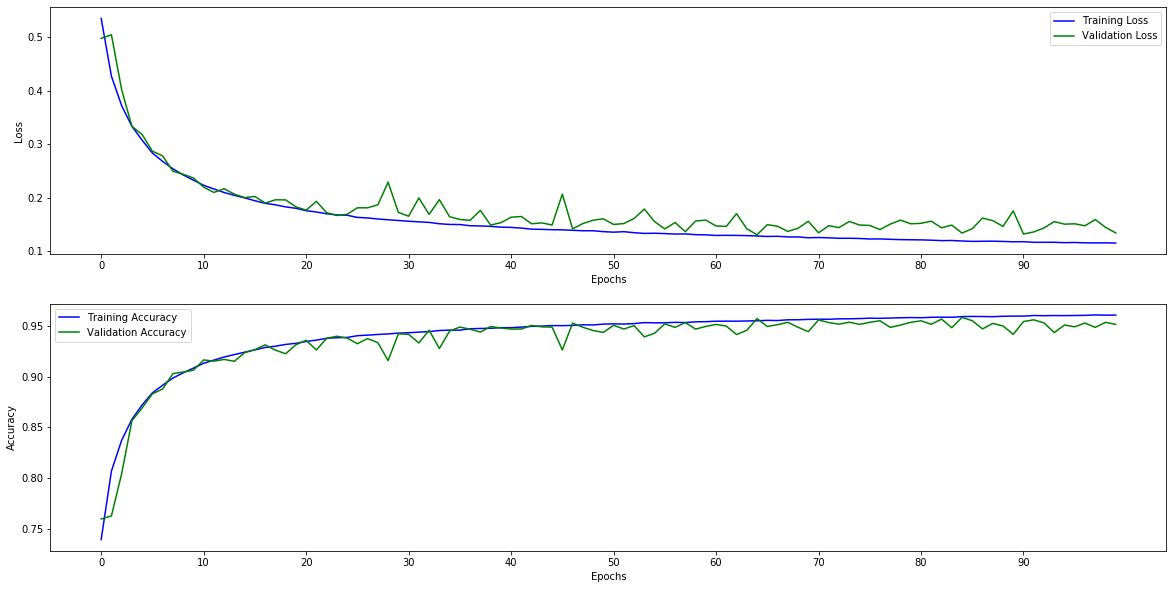

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc=history.history['acc']
val_acc=history.history['val_acc']

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::10])
plt.legend()

plt.subplot(2,1,2)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc, 'blue', label='Training Accuracy')
plt.plot(val_acc, 'green', label='Validation Accuracy')
plt.xticks(range(0,epochs)[0::10])
plt.legend()

plt.show()

In [20]:
with open('spo2_accuracy_loss_nn2', 'wb') as f:
    pickle.dump([acc,val_acc,loss,val_loss], f)

In [21]:
y_pred = model_spo2.predict(spo2_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

array([[48851,  1517],
       [  285,  1083]], dtype=int64)

In [22]:
(cm[1,1]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1])

0.9651693211690119

In [23]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.7916666666666666

In [24]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.9698816709021602

In [25]:
model_spo21=model_spo2

In [26]:
model_spo21.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 88, 1)             4         
_________________________________________________________________
conv1d (Conv1D)              (None, 88, 6)             156       
_________________________________________________________________
activation (Activation)      (None, 88, 6)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 88, 50)            3050      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 44, 50)            0         
_________________________________________________________________
activation_1 (Activation)    (None, 44, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 44, 30)            2

In [27]:
best_weights_filepath_spo2 = './best_weights_spo2_3_312layer.hdf5'

In [28]:
model_spo21.load_weights(best_weights_filepath_spo2)
y_pred = model_spo21.predict(spo2_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

array([[49068,  1300],
       [  210,  1158]], dtype=int64)

In [29]:
(cm[1,1]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1])

0.9708133601360754

In [30]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.8464912280701754

In [31]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.9741899618805591

In [32]:
model_spo21=model_spo2
best_weights_filepath_spo2 = './best_weights_spo2_3_312layer.hdf5'
model_spo21.load_weights(best_weights_filepath_spo2)

In [33]:
import tensorflow_model_optimization as tfmot

### Code for 10% sparsity. Change final sparsity to obtain all models at different sparsities

In [66]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 50


num_images = spo2_train.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0,
                                                               final_sparsity=0.1, #for 10% sparsity
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model_spo21, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_batch_no (None, 88, 1)             5         
_________________________________________________________________
prune_low_magnitude_conv1d ( (None, 88, 6)             308       
_________________________________________________________________
prune_low_magnitude_activati (None, 88, 6)             1         
_________________________________________________________________
prune_low_magnitude_conv1d_1 (None, 88, 50)            6052      
_________________________________________________________________
prune_low_magnitude_max_pool (None, 44, 50)            1         
_________________________________________________________________
prune_low_magnitude_activati (None, 44, 50)            1         
_________________________________________________________________
prune_low_magnitude_conv1d_2 (None, 44, 30)            4

In [67]:
import tempfile

In [68]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

In [74]:
history_prune=model_for_pruning.fit(spo2_train, y_train_wide,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(spo2_valid, y_valid_wide),
                      callbacks=callbacks)

Epoch 1/10
25186/25186 [==============================] - 257s 10ms/step - loss: 0.0882 - accuracy: 0.9718 - val_loss: 0.1457 - val_accuracy: 0.9579
Epoch 2/10
25186/25186 [==============================] - 256s 10ms/step - loss: 0.0883 - accuracy: 0.9716 - val_loss: 0.1303 - val_accuracy: 0.9590
Epoch 3/10
25186/25186 [==============================] - 259s 10ms/step - loss: 0.0883 - accuracy: 0.9717 - val_loss: 0.1201 - val_accuracy: 0.9609
Epoch 4/10
25186/25186 [==============================] - 252s 10ms/step - loss: 0.0882 - accuracy: 0.9717 - val_loss: 0.1428 - val_accuracy: 0.9572
Epoch 5/10
25186/25186 [==============================] - 250s 10ms/step - loss: 0.0878 - accuracy: 0.9719 - val_loss: 0.1359 - val_accuracy: 0.9553
Epoch 6/10
25186/25186 [==============================] - 252s 10ms/step - loss: 0.0881 - accuracy: 0.9717 - val_loss: 0.1386 - val_accuracy: 0.9562
Epoch 7/10
25186/25186 [==============================] - 250s 10ms/step - loss: 0.0878 - accuracy: 0.9719

In [75]:
y_pred = model_for_pruning.predict(spo2_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

array([[49372,   996],
       [  257,  1111]], dtype=int64)

In [76]:
(cm[1,1]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1])

0.9757808875831143

In [77]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.8121345029239766

In [78]:
cm[0,0]/(cm[0,0]+cm[0,1])

0.980225540025413

In [62]:
model_for_pruning.save_weights('./best_weights_spo2_3_312layer_prune_10_train.hdf5')

In [103]:
#check model sparsity in each layer
model_for_pruning.load_weights('./best_weights_spo2_3_312layer_prune_80_train.hdf5')
model = model_for_pruning
import numpy as np

for i, w in enumerate(model.get_weights()):
    print(
        "{} -- Total:{}, Zeros: {:.2f}%".format(
            model.weights[i].name, w.size, np.sum(w == 0) / w.size * 100
        )
    )

batch_normalization/gamma:0 -- Total:1, Zeros: 0.00%
batch_normalization/beta:0 -- Total:1, Zeros: 0.00%
batch_normalization/moving_mean:0 -- Total:1, Zeros: 0.00%
batch_normalization/moving_variance:0 -- Total:1, Zeros: 0.00%
prune_low_magnitude_batch_normalization/pruning_step:0 -- Total:1, Zeros: 0.00%
conv1d/kernel:0 -- Total:150, Zeros: 80.00%
conv1d/bias:0 -- Total:6, Zeros: 0.00%
prune_low_magnitude_conv1d/mask:0 -- Total:150, Zeros: 80.00%
prune_low_magnitude_conv1d/threshold:0 -- Total:1, Zeros: 0.00%
prune_low_magnitude_conv1d/pruning_step:0 -- Total:1, Zeros: 0.00%
prune_low_magnitude_activation/pruning_step:0 -- Total:1, Zeros: 0.00%
conv1d_1/kernel:0 -- Total:3000, Zeros: 80.00%
conv1d_1/bias:0 -- Total:50, Zeros: 0.00%
prune_low_magnitude_conv1d_1/mask:0 -- Total:3000, Zeros: 80.00%
prune_low_magnitude_conv1d_1/threshold:0 -- Total:1, Zeros: 0.00%
prune_low_magnitude_conv1d_1/pruning_step:0 -- Total:1, Zeros: 0.00%
prune_low_magnitude_max_pooling1d/pruning_step:0 -- Total